Importing the Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

Preprocessing the Training Image

In [2]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

train_set = train_generator.flow_from_directory(
    directory="/kaggle/input/cardiomegaly-disease-prediction-using-cnn/train/train",
    target_size=(64,64),
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical"
)

Found 4438 images belonging to 2 classes.


In [3]:
print(train_set.class_indices)

{'false': 0, 'true': 1}


Processing the Test Images

In [4]:
test_generator = ImageDataGenerator(
    rescale=1./255
)

test_set = test_generator.flow_from_directory(
    directory="/kaggle/input/cardiomegaly-disease-prediction-using-cnn/test/test",
    batch_size=64,
    target_size=(64,64),
    color_mode="grayscale",
    class_mode="categorical"
    
)

Found 1114 images belonging to 2 classes.


Building the Convolution Neural Network

In [5]:
cnn_model = tf.keras.models.Sequential()

Adding the first Convolution and Pooling layer

In [6]:
cnn_model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape = (64,64,1)))
cnn_model.add(tf.keras.layers.MaxPool2D())


Adding the second Convolution and Pooling layer

In [7]:
cnn_model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu"))
cnn_model.add(tf.keras.layers.MaxPool2D())


Adding the third Convolution and Pooling Layer

In [8]:
cnn_model.add(tf.keras.layers.Conv2D(filters=12,kernel_size=(3,3),activation="relu"))
cnn_model.add(tf.keras.layers.MaxPool2D())


In [9]:
cnn_model.add(tf.keras.layers.Flatten())

In [10]:
cnn_model.add(tf.keras.layers.Dense(units = 144,activation="relu"))
cnn_model.add(tf.keras.layers.Dense(units = 78,activation="relu"))
cnn_model.add(tf.keras.layers.Dense(units = 2,activation="softmax"))


In [11]:
cnn_model.compile(loss = "binary_crossentropy",optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),metrics=["accuracy"])

In [12]:
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 12)        1740      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 12)         0

In [13]:
history = cnn_model.fit(x = train_set,validation_data=test_set,epochs=50)

Epoch 1/50
70/70 [==============================] - 27s 295ms/step - loss: 0.6908 - accuracy: 0.5392 - val_loss: 0.6872 - val_accuracy: 0.5422
Epoch 2/50
70/70 [==============================] - 8s 112ms/step - loss: 0.6856 - accuracy: 0.5791 - val_loss: 0.6804 - val_accuracy: 0.5700
Epoch 3/50
70/70 [==============================] - 8s 110ms/step - loss: 0.6750 - accuracy: 0.5933 - val_loss: 0.6604 - val_accuracy: 0.6436
Epoch 4/50
70/70 [==============================] - 6s 89ms/step - loss: 0.6548 - accuracy: 0.6244 - val_loss: 0.6344 - val_accuracy: 0.6652
Epoch 5/50
70/70 [==============================] - 6s 92ms/step - loss: 0.6418 - accuracy: 0.6246 - val_loss: 0.6191 - val_accuracy: 0.6517
Epoch 6/50
70/70 [==============================] - 6s 90ms/step - loss: 0.6343 - accuracy: 0.6372 - val_loss: 0.6130 - val_accuracy: 0.6598
Epoch 7/50
70/70 [==============================] - 7s 96ms/step - loss: 0.6314 - accuracy: 0.6395 - val_loss: 0.6186 - val_accuracy: 0.6373
Epoch 8/5

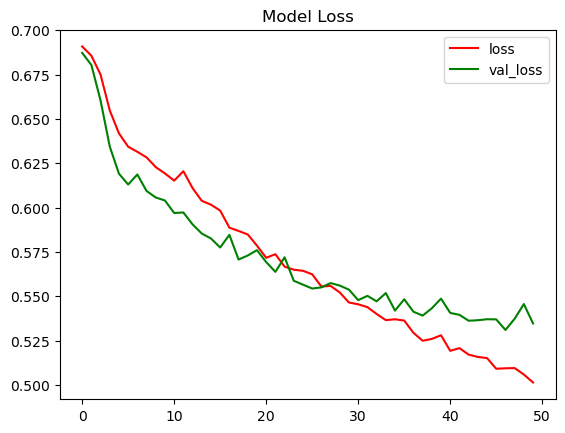

In [14]:
plt.plot(history.history["loss"],color = "red")
plt.plot(history.history["val_loss"],color = "green")
plt.title("Model Loss")
plt.legend(["loss","val_loss"])
plt.show()

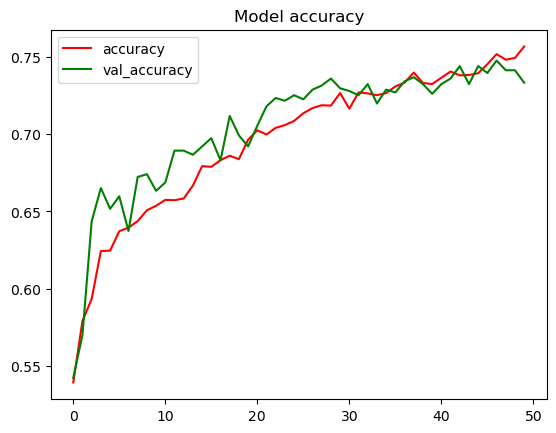

In [15]:
plt.plot(history.history["accuracy"],color = "red")
plt.plot(history.history["val_accuracy"],color = "green")
plt.title("Model accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

In [16]:
print(test_set.class_indices)

{'false': 0, 'true': 1}
